<a href="https://colab.research.google.com/github/ernie-Griffiths/Determining-the-Validity-of-Genetically-Engineered-Crops-in-a-Warming-Climate-Using-Machine-Learning/blob/main/Revisited_Keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

from keras.callbacks import ModelCheckpoint


from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
Phenotype_Soil_Weather_Data = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Finalised data/FeatureSelected_Phenotype_Soil_Weather_Data.csv",index_col=[0])

In [ ]:
Phenotype_Soil_Weather_Data.head(2)

,Field-Location,Source,Pedigree,Family,Tester,Replicate,Block,Range,Pass,Anthesis [MM/DD/YY],Silking [MM/DD/YY],Anthesis [days],Silking [days],Plant Height [cm],Ear Height [cm],Stand Count [# of plants],Grain Moisture [%],Test Weight [lbs],Plant Month,Harvest Month,Location,E Depth,1:1 Soil pH,WDRF Buffer pH,1:1 S Salts mmho/cm,Texture No,Organic Matter LOI %,Nitrate-N ppm N,lbs N/A,Potassium ppm K,Sulfate-S ppm S,Calcium ppm Ca,Magnesium ppm Mg,Sodium ppm Na,CEC/Sum of Cations me/100g,%H Sat,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,% Sand,% Silt,% Clay,Texture,Temperature [C],Dew Point [C],Relative Humidity [%],Solar Radiation [W/m2],Rainfall [mm],Wind Speed [m/s],Wind Direction [degrees],Wind Gust [m/s],Soil Temperature [C],Seed Success factor
0,DEH1,WIPV17/30359,PHN11_PHW65_0512/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,2.0,7/2/2019,7/2/2019,54.0,54.0,274.0,117.0,60.0,20.0,57.2,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.22562,141.449484,6.775455,23.81826,1.524510
1,DEH1,WIPV17/30278,PHN11_PHW65_0278/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,3.0,7/2/2019,7/2/2019,54.0,54.0,251.0,121.0,58.0,19.5,54.5,5.0,9.0,DEH1,8.0,6.6,7.2,0.13,1.0,2.4,28.6,69.0,125.0,15.0,487.0,75.0,8.0,3.4,0.0,9.0,71.0,18.0,1.0,136.0,81.0,9.0,10.0,Loamy Sand,23.041976,13.951074,72.528273,212.490939,0.012235,0.22562,141.449484,6.775455,23.81826,2.057006


In [ ]:
Phenotype_Soil_Weather_Data['Texture'] = pd.factorize(Phenotype_Soil_Weather_Data['Texture'])[0] + 1

In [ ]:
Phenotype_Soil_Weather_Data = Phenotype_Soil_Weather_Data.dropna()

In [ ]:
xdata = Phenotype_Soil_Weather_Data.drop(["Seed Success factor","Field-Location",	"Source","Pedigree",	"Family",	"Tester",	"Replicate",	"Block","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Location"], axis = 1)
ydata = Phenotype_Soil_Weather_Data["Seed Success factor"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.4,shuffle = True, random_state = 42)

# x_train=np.asarray(x_train).astype(np.int)

# y_train=np.asarray(y_train).astype(np.int)

# x_test=np.asarray(x_test).astype(np.int)

# y_test=np.asarray(y_test).astype(np.int)

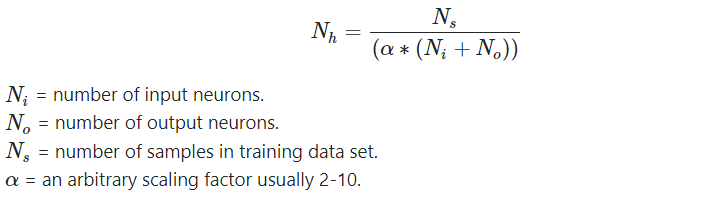

In [ ]:
model = Sequential()


model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))


# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
#adam = 68 , Adadelta = 59, RMSprop = 66 , Adagrad = 64;
# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5760      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 236,417
Trainable params: 236,417
Non-trai

In [ ]:
# checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint_name = 'BestWeight.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='min')
callbacks_list = [checkpoint]

In [ ]:
model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
104/104 [==============================] - ETA: 0s - loss: 1.0775 - mean_absolute_error: 1.0775
Epoch 1: val_loss improved from inf to 0.31132, saving model to BestWeight.hdf5
104/104 [==============================] - 3s 15ms/step - loss: 1.0775 - mean_absolute_error: 1.0775 - val_loss: 0.3113 - val_mean_absolute_error: 0.3113
Epoch 2/500
104/104 [==============================] - ETA: 0s - loss: 0.3240 - mean_absolute_error: 0.3240
Epoch 2: val_loss did not improve from 0.31132
104/104 [==============================] - 1s 10ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - val_loss: 0.3211 - val_mean_absolute_error: 0.3211
Epoch 3/500
102/104 [============================>.] - ETA: 0s - loss: 0.3298 - mean_absolute_error: 0.3298
Epoch 3: val_loss did not improve from 0.31132
104/104 [==============================] - 1s 11ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - val_loss: 0.3322 - val_mean_absolute_error: 0.3322
Epoch 4/500
103/104 [===================

In [ ]:
# Load weights file of the best model :
weights_file = '/content/BestWeight.hdf5' # choose the best checkpoint
model.load_weights(weights_file) # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
predictions = model.predict(x_test)
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])#

acc_score = r2_score(y_test, predictions)
Mean_Error = mean_squared_error(y_test, predictions, squared=False)
print("Accuracy score")
print(acc_score)
print("Error Bracket")
print(Mean_Error)

Results = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Results /LAResults.csv",index_col=[0])

dict = {'Learning Algorithum': 'Convolutional Nerual Network', 'R2 Score': acc_score, 'Error Bracket': Mean_Error}

Results = Results.append(dict, ignore_index = True)

Accuracy score
0.6967458992135374
Error Bracket
0.3196381966646548


In [ ]:
Results

,Learning Algorithum,R2 Score,Error Bracket
0,Regression Tree,0.671146,0.332852
1,Random Forest,0.720002,0.303280
2,KNN Regression,0.693163,0.318367
3,Gradient Boosting Regressor,0.741307,0.295217
4,Convolutional Nerual Network,0.696746,0.319638


In [ ]:
Results.to_csv('LAResults.csv')
!cp LAResults.csv "/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Results "